In [59]:
import pandas as pd
import numpy as np
import seaborn as sb
import pickle

In [60]:
dfPhenotypes = pd.read_csv("sc2_Phase1_CN_Phenotype.tsv",sep="\t")
dfPhenotypes = dfPhenotypes.replace(r'^\s*$', np.nan, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^IV', 4, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^III', 3, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^II', 2, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^I', 1, regex=True)
dfPhenotypes['WHO_GRADING'].replace(np.nan, 0, regex=True,inplace=True)
dfPhenotypes.head()

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE
0,patient_290,NaN,NaN,2.0,ASTROCYTOMA
1,patient_394,NaN,NaN,0.0,GBM
2,patient_81,NaN,NaN,3.0,ASTROCYTOMA
3,patient_307,NaN,NaN,0.0,UNCLASSIFIED
4,patient_14,NaN,NaN,0.0,GBM


In [61]:
dfOutcomes = pd.read_csv("sc2_Phase1_CN_Outcome.tsv",sep="\t")
dfOutcomes['SURVIVAL_STATUS'].value_counts()
#dfOutcomes[dfOutcomes['SURVIVAL_STATUS'] == 1].sample(n=51)
#dfOutcomes.head()

1    131
0     43
Name: SURVIVAL_STATUS, dtype: int64

In [62]:
dfFeatures = pd.read_csv("sc2_Phase1_CN_FeatureMatrix.tsv",sep="\t")
dfFeatures.head()

,PATIENTID,1p36.33,1p36.32,1p36.31,1p36.23,1p36.22,1p36.21,1p36.13,1p36.12,1p36.11,...,22q11.22,22q11.23,22q12.1,22q12.2,22q12.3,22q13.1,22q13.2,22q13.31,22q13.32,22q13.33
0,patient_290,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,patient_394,0.0,1.754379,1.505748,1.935076,1.448549,1.253364,2.057036,1.682664,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,patient_81,0.0,0.000000,0.628766,0.000000,0.624529,0.000000,0.000000,0.000000,0.000000,...,0.0,0.66053,0.631818,1.785078,1.358591,1.240261,0.901599,0.659092,0.0,0.0
3,patient_307,0.0,0.726093,0.000000,0.880939,1.755415,1.475263,1.131310,0.000000,0.594254,...,0.0,0.00000,0.000000,0.000000,1.380215,1.482663,0.590108,0.000000,0.0,0.0
4,patient_14,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [63]:
dfs = pd.merge(dfPhenotypes,dfOutcomes,how="inner",on="PATIENTID")
dfMerged = pd.merge(dfs,dfFeatures,how="inner",on="PATIENTID")
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Columns: 817 entries, PATIENTID to 22q13.33
dtypes: float64(791), int64(22), object(4)
memory usage: 1.1+ MB


In [64]:
dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNKNOWN']
dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNCLASSIFIED']
dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'MIXED']
#dfMerged = dfMerged[dfMerged.WHO_GRADING != 0]
dfCount = dfMerged[dfMerged['SURVIVAL_STATUS']==0]
dfCount.head()

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS,1p36.33,1p36.32,1p36.31,1p36.23,...,22q11.22,22q11.23,22q12.1,22q12.2,22q12.3,22q13.1,22q13.2,22q13.31,22q13.32,22q13.33
40,patient_379,FEMALE,WHITE,0.0,ASTROCYTOMA,0,0.0,0.733609,0.747663,0.736605,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
48,patient_468,FEMALE,WHITE,4.0,GBM,0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50,patient_171,MALE,WHITE,3.0,OLIGODENDROGLIOMA,0,0.0,1.666927,1.539085,1.928604,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
71,patient_344,MALE,WHITE,4.0,GBM,0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
76,patient_576,MALE,WHITE,4.0,GBM,0,0.0,0.000000,0.740568,0.000000,...,0.0,0.0,0.619537,0.0,0.0,1.125196,0.675656,0.663252,0.0,0.0


In [65]:
dfMergedDownSampledOutcomes=pd.concat([
        dfMerged[dfMerged['SURVIVAL_STATUS'] == 1].sample(n=len(dfCount.index)*6,replace=True),
        dfMerged[dfMerged['SURVIVAL_STATUS'] == 0].sample(n=len(dfCount.index)*6,replace=True)
])
dfMergedDownSampledOutcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 60 to 101
Columns: 817 entries, PATIENTID to 22q13.33
dtypes: float64(791), int64(22), object(4)
memory usage: 2.2+ MB


In [66]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2, SelectKBest, f_classif, RFE, mutual_info_classif
X = dfMergedDownSampledOutcomes
X = X.drop(columns=['PATIENTID','SEX','WHO_GRADING','RACE','CANCER_TYPE','SURVIVAL_STATUS'])
y = dfMergedDownSampledOutcomes.iloc[:,4]
y.value_counts()

GBM                  186
ASTROCYTOMA          117
OLIGODENDROGLIOMA     45
Name: CANCER_TYPE, dtype: int64

In [67]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=400)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Bands','Score']  #naming the dataframe columns
#print(featureScores.nlargest(400,'Score'))  #print 10 best features

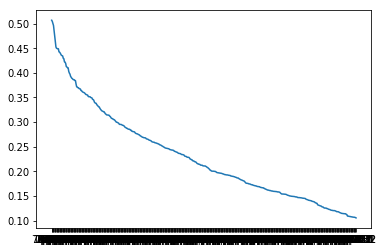

In [68]:
import matplotlib.pyplot as plt
Vals= featureScores.nlargest(500,'Score')  #print 10 best features
xVal = Vals['Bands']
yVal = Vals['Score']
plt.plot(xVal,yVal)  #print 10 best features
plt.show()

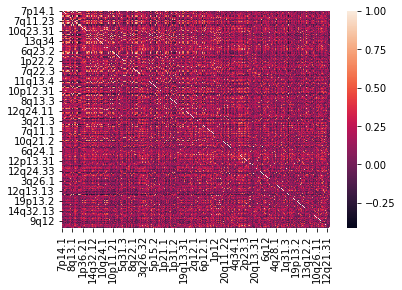

In [69]:
selCols = pd.Series(['SURVIVAL_STATUS'])
dfSelectedY = dfMergedDownSampledOutcomes.loc[:,selCols]
dfSelectedX = dfMergedDownSampledOutcomes.loc[:,xVal[0:]]


import seaborn as sns
corrMap = dfSelectedX.corr()
sns.heatmap(corrMap)

In [70]:
dfT = dfSelectedX
# Create correlation matrix
corr_matrix = dfT.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#print(upper)
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)


['8q24.12', '7p21.2', '1q11', '1q12', '10q11.1']


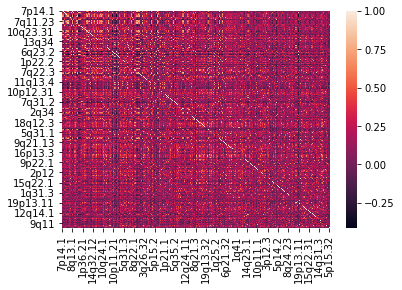

In [71]:
# Drop features 
dfT.drop(to_drop, axis=1,inplace=True)
corrMap = dfT.corr()
sns.heatmap(corrMap)
dfSelectedX = dfT

In [72]:
filehandle = open('sc2_phase1_features.txt', 'w')
filehandle.write(','.join(map(str, list(dfSelectedX))) )
filehandle.close()
list(dfSelectedX)

['7p14.1',
 '7q11.21',
 '7q36.2',
 '7q21.3',
 '7p11.2',
 '8q23.2',
 '7q22.1',
 '10p15.3',
 '5p15.31',
 '10q26.13',
 '8q11.21',
 '7q31.1',
 '7p13',
 '7q34',
 '7q11.22',
 '4p16.1',
 '13q14.11',
 '7q36.1',
 '8q23.1',
 '8q13.1',
 '7q21.11',
 '8q21.13',
 '8q24.13',
 '7q11.23',
 '4q35.2',
 '10q21.3',
 '4q22.1',
 '11p15.4',
 '7q32.1',
 '7p15.1',
 '7q36.3',
 '8q24.21',
 '5p15.33',
 '8q23.3',
 '10q23.1',
 '8q24.3',
 '1p31.1',
 '11q25',
 '1p36.21',
 '19q13.41',
 '6q22.32',
 '6p21.1',
 '6q14.1',
 '8p12',
 '19q13.42',
 '11p14.3',
 '10q23.31',
 '7q31.32',
 '7p14.3',
 '5q15',
 '10p11.23',
 '13q21.31',
 '10q23.33',
 '1p36.23',
 '1p34.2',
 '7q22.2',
 '7p15.2',
 '14q32.12',
 '1p34.3',
 '6q25.1',
 '10p12.1',
 '10q22.2',
 '13q31.1',
 '18q23',
 '6q16.1',
 '10q26.3',
 '7q35',
 '1p36.31',
 '6q27',
 '13q34',
 '7p22.1',
 '8q11.1',
 '10q24.32',
 '1p31.3',
 '7p14.2',
 '10q26.2',
 '10q24.1',
 '4q24',
 '1p36.11',
 '3q29',
 '19q13.43',
 '6q21',
 '13q32.3',
 '2q14.3',
 '19q13.12',
 '19q13.11',
 '8p21.3',
 '7q33',
 

In [73]:
####Neural Net####
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image  
import pydotplus
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import sklearn

clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 8), random_state=0)
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

scaler = StandardScaler()

totScore=0
totSensitivity = 0
totSpecificity = 0
totAUC = 0
i=0

#print(dfSelectedX.head())
for train_index,test_index in cv.split(dfSelectedX,dfSelectedY):
    x_train, x_test = dfSelectedX.iloc[train_index], dfSelectedX.iloc[test_index]
    y_train, y_test = dfSelectedY.iloc[train_index], dfSelectedY.iloc[test_index]
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    
    clfNN.fit(x_train, y_train.values.ravel())
    predictions = clfNN.predict(x_test)

    predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
    #print(predY)

    finalPred = pd.concat([y_test,predY],axis=1)
    #print(finalPred)
    print(sklearn.metrics.multilabel_confusion_matrix(y_test, predictions))
    print("\n-----------------------------")
    tn,fp,fn,tp = sklearn.metrics.confusion_matrix(y_test, predictions).ravel()
    print(" tn\tfp\tfn\t tp\n",tn,"\t",fp,"\t",fn,"\t",tp)
    score = clfNN.score(x_test, y_test)
    sensitivity = tp*100/(tp+fn)
    specificity = tn*100/(tn+fp)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
    auc = sklearn.metrics.auc(fpr, tpr)
    print("\naccuracy:", score)
    print("sensitivity:", sensitivity)
    print("specificity:", specificity)
    print("AUC:", auc)
    print("-----------------------------\n")
    #score = clfNN.score(x_test, y_test)
    #sensitivity = tp*100/(tp+fn)
    #specificity = tn*100/(tn+fp)
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
    #auc = sklearn.metrics.auc(fpr, tpr)
    #print(score)
    
    totScore = totScore + score
    totSensitivity = totSensitivity + sensitivity
    totSpecificity = totSpecificity + specificity
    totAUC = totAUC + auc
    i=i+1
    
print("average accuracy:", totScore/i)
print("average sensitivity:", totSensitivity/i)
print("average specificity:", totSpecificity/i)
print("average AUC:", totAUC/i)


[[[17  1]
  [ 2 16]]

 [[16  2]
  [ 1 17]]]

-----------------------------
 tn	fp	fn	 tp
 16 	 2 	 1 	 17

accuracy: 0.9166666666666666
sensitivity: 94.44444444444444
specificity: 88.88888888888889
AUC: 0.9166666666666666
-----------------------------

[[[15  3]
  [ 0 18]]

 [[18  0]
  [ 3 15]]]

-----------------------------
 tn	fp	fn	 tp
 18 	 0 	 3 	 15

accuracy: 0.9166666666666666
sensitivity: 83.33333333333333
specificity: 100.0
AUC: 0.9166666666666667
-----------------------------

[[[18  0]
  [ 1 17]]

 [[17  1]
  [ 0 18]]]

-----------------------------
 tn	fp	fn	 tp
 17 	 1 	 0 	 18

accuracy: 0.9722222222222222
sensitivity: 100.0
specificity: 94.44444444444444
AUC: 0.9722222222222222
-----------------------------

[[[16  2]
  [ 3 15]]

 [[15  3]
  [ 2 16]]]

-----------------------------
 tn	fp	fn	 tp
 15 	 3 	 2 	 16

accuracy: 0.8611111111111112
sensitivity: 88.88888888888889
specificity: 83.33333333333333
AUC: 0.8611111111111112
-----------------------------

[[[16  1]
  

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfSelectedX, dfSelectedY, test_size=0.01, random_state=42)
clfNN.fit(x_train, y_train.values.ravel())
finalFile = "sc2_phase1_model.sav"
pickle.dump(clfNN, open(finalFile, 'wb'))